# Sok-1006 Mikro
## Seminar 8
### Oppgave 3

Vi gjenbruker mye av koden fra Seminar 8 oppgave 2 og Seminar 7 oppgave 3.

### deloppgave a

In [312]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [313]:
# Sett opp Lagrange for nyttemaksimering
sp.symbols("\lambda", real=True, positive=True)
x_1, x_2, m, p_1, p_2, lmda, gma_1, gma_2, b_1, b_2 =sp.symbols("x_1 x_2 m p_1 p_2 \lambda \gamma_1 \gamma_2 b_1 b_2", real=True, positive=True)
U=b_1*sp.log(x_1-gma_1)+b_2*sp.log(x_2-gma_2)
L=U-lmda*(p_1*x_1+p_2*x_2-m)
L

-\lambda*(-m + p_1*x_1 + p_2*x_2) + b_1*log(-\gamma_1 + x_1) + b_2*log(-\gamma_2 + x_2)

In [314]:
# Førsteordensbetingelser
dL_x_1=sp.diff(L,x_1)
dL_x_2=sp.diff(L,x_2)
display(dL_x_1)
display(dL_x_2)

-\lambda*p_1 + b_1/(-\gamma_1 + x_1)

-\lambda*p_2 + b_2/(-\gamma_2 + x_2)

In [315]:
display(dL_x_1.args)
display(dL_x_2.args)

(b_1/(-\gamma_1 + x_1), -\lambda*p_1)

(b_2/(-\gamma_2 + x_2), -\lambda*p_2)

In [316]:
display(dL_x_1.args[0]/dL_x_2.args[0])
display(dL_x_1.args[1]/dL_x_2.args[1])

b_1*(-\gamma_2 + x_2)/(b_2*(-\gamma_1 + x_1))

p_1/p_2

Da har vi $\frac{p_1}{p_2}=\frac{b_1(x_2-\gamma_2)}{b_2(x_1-\gamma_1)}$. Finn uttrykket for $x_1$:

In [317]:
x_1_rel=sp.solve(dL_x_1.args[0]/dL_x_2.args[0]-dL_x_1.args[1]/dL_x_2.args[1],x_1)[0]
x_2_rel=sp.solve(dL_x_1.args[0]/dL_x_2.args[0]-dL_x_1.args[1]/dL_x_2.args[1],x_2)[0]
display(x_1_rel)
display(x_2_rel)

(\gamma_1*b_2*p_1 - \gamma_2*b_1*p_2 + b_1*p_2*x_2)/(b_2*p_1)

(-\gamma_1*b_2*p_1 + \gamma_2*b_1*p_2 + b_2*p_1*x_1)/(b_1*p_2)

Da har vi $x_1, x_2$ som vi bruker i budsjettbetingelsen.

In [318]:
x_1_sol=sp.solve(sp.Eq((p_1*x_1+p_2*x_2).subs(x_2,x_2_rel),m),x_1)[0]
x_2_sol=sp.solve(sp.Eq((p_1*x_1+p_2*x_2).subs(x_1,x_1_rel),m),x_2)[0]
display(x_1_sol)
display(x_2_sol)

(\gamma_1*b_2*p_1 - \gamma_2*b_1*p_2 + b_1*m)/(p_1*(b_1 + b_2))

(-\gamma_1*b_2*p_1 + \gamma_2*b_1*p_2 + b_2*m)/(p_2*(b_1 + b_2))

In [319]:
# Bruk b_1+b_2=1
x_1_dem=x_1_sol.subs(b_2,(1-b_1))
x_1_dem

(\gamma_1*p_1*(1 - b_1) - \gamma_2*b_1*p_2 + b_1*m)/p_1

Dette er etterspørsel etter gode 1.       

In [320]:
x_2_dem=x_2_sol.subs(b_1,(1-b_2))
x_2_dem

(-\gamma_1*b_2*p_1 + \gamma_2*p_2*(1 - b_2) + b_2*m)/p_2

som er etterspørsel etter gode 2.      

Vi setter inn de oppgitte tallverdiene for å finne tilpasningen i utgangspunktet.

In [321]:
x_1_opt=x_1_dem.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5),(p_1,2),(p_2,2),(m,100)])
x_1_opt

25.0000000000000

In [322]:
x_2_opt=x_2_dem.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5),(p_1,2),(p_2,2),(m,100)])
x_2_opt

25.0000000000000

Vi begynner med en etterspørsel på 25 enheter på hvert gode.      

Nyttenivået er

In [323]:
U_0=U.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5),(x_1,25),(x_2,25)])
np.round(float(U_0),2)

3.18

Da har vi $U_0=3.18$.   
La oss finne likningen for en indifferenskurve som gir dette nyttenivået.

In [324]:

x2_ind_sol=sp.solve(U-U_0,x_2)[0]
x_2_IK=x2_ind_sol.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5)])
x_2_IK

576.0/(x_1 - 1)**1.0 + 1

In [325]:
# lag en funksjon som kan plottes
indiff_x_2=sp.lambdify( (x_1), x_2_IK)
indiff_x_2(x_1)

576.0/(x_1 - 1)**1.0 + 1

In [326]:
# budsjett 
def x_2_bud(m,p_1,p_2,x_1):
    return ((m-p_1*x_1)/p_2)
x_2_bud(m,p_1,p_2,x_1)

(m - p_1*x_1)/p_2

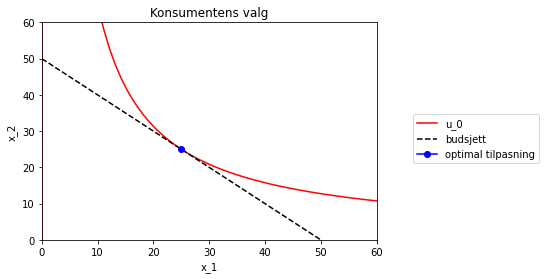

In [327]:
x1_num=np.linspace(0.01,100,100)



fig,ax=plt.subplots()
 
ax.set_ylabel('x_2')
ax.set_xlabel('x_1')
ax.plot(x1_num, indiff_x_2(x1_num),label='u_0', color='red')

ax.plot(x1_num, x_2_bud(100,2,2,x1_num), label='budsjett', color='black', ls='dashed')
        
ax.plot(25,25,marker='o', color='blue', label='optimal tilpasning')


             
    
ax.set_ylim([0, 60])
ax.set_xlim([0, 60])


ax.legend(bbox_to_anchor=(1.5,0.6))
ax.set_title('Konsumentens valg')


plt.show()

### deloppgave b)

Først finner vi tilpasningen med $p_1=1$.

In [328]:
x_1_opt_ny=x_1_dem.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5),(p_1,1),(p_2,2),(m,100)])
x_1_opt_ny

49.5000000000000

In [329]:
x_2_opt_ny=x_2_dem.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5),(p_1,1),(p_2,2),(m,100)])
x_2_opt_ny

25.2500000000000

Vi får en økning i etterspørsel etter gode 1 på 24.5, og en økning på 0.25 for gode 2.     

Finn nyttenivået:

In [330]:
U_1=U.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5),(x_1,49.5),(x_2,25.25)])
np.round(float(U_1),2)

3.53

In [331]:
x2_ind_ny=sp.solve(U-U_1,x_2)[0]
x_2_IK_ny=x2_ind_ny.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5)])
x_2_IK_ny

1176.12499999999/(x_1 - 1)**1.0 + 1

In [332]:
# lag en funksjon som kan plottes
indiff_x_2_ny=sp.lambdify( (x_1), x_2_IK_ny)
indiff_x_2_ny(x_1)

1176.12499999999/(x_1 - 1)**1.0 + 1

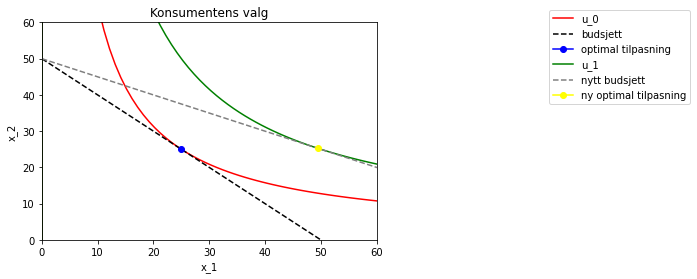

In [333]:
ax.plot(x1_num, indiff_x_2_ny(x1_num),label='u_1', color='green')

ax.plot(x1_num, x_2_bud(100,1,2,x1_num), label='nytt budsjett', color='gray', ls='dashed')
        
ax.plot(49.5,25.25,marker='o', color='yellow', label='ny optimal tilpasning')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

### deloppgave c)

Nytte er gitt ved `U=b_1*sp.log(x_1-gma_1)+b_2*sp.log(x_2-gma_2)`, og `x_1_dem`, `x_2_dem` gir tilpasningen. Da kan vi si at oppnådd nytte er V hvor

In [334]:
V=U.subs([(x_1,x_1_dem),(x_2,x_2_dem)])
V

b_1*log(-\gamma_1 + (\gamma_1*p_1*(1 - b_1) - \gamma_2*b_1*p_2 + b_1*m)/p_1) + b_2*log(-\gamma_2 + (-\gamma_1*b_2*p_1 + \gamma_2*p_2*(1 - b_2) + b_2*m)/p_2)

Gitt tallverdiene for våre variabler må vi finne m som gjør at dette uttrykket er lik `U_0`. La oss sette inn verdiene slik at kun m er ukjent.

In [335]:
V_m=V.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5),(p_1,1),(p_2,2)])
V_m

0.5*log(0.25*m - 0.75) + 0.5*log(0.5*m - 1.5)

In [336]:
m_komp=sp.solve(V_m-U_0,m)[0]
m_komp

70.8822509939086

Dette vil si at nyttenivået U_0 kan oppnås med $p_1=1, p_2=2$ og inntektsnivå `m_komp`. Med denne inntekten kan vi beregne optimal tilpasning, og tegne inn ny budsjettlinje med disse priser.

In [337]:
x_1_komp=x_1_dem.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5),(p_1,1),(p_2,2),(m,m_komp)])
x_1_komp

34.9411254969543

In [338]:
x_2_komp=x_2_dem.subs([(gma_1,1),(gma_2,1), (b_1,.5),(b_2,.5),(p_1,1),(p_2,2),(m,m_komp)])
x_2_komp

17.9705627484771

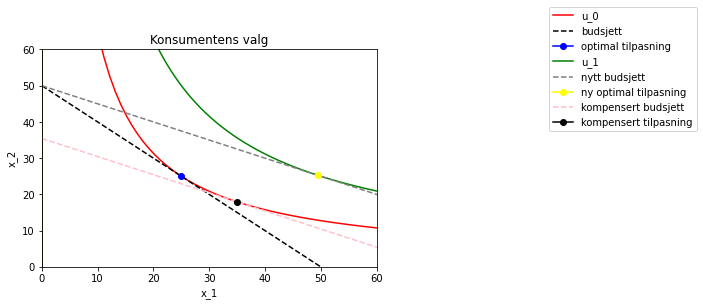

In [339]:
ax.plot(x1_num, x_2_bud(m_komp,1,2,x1_num), label='kompensert budsjett', color='pink', ls='dashed')
ax.plot(x_1_komp,x_2_komp,marker='o', color='black', label='kompensert tilpasning')
ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Mengder ved den blå prikken er gitt ved `x_i_opt`, den gule ved `x_i_opt_ny`, den svarte ved `x_i_komp`, hvor i=1,2.

### deloppgave d)

Da kan vi identifisere hvordan den totale effekten (blå til gull prikk) kan deles inn i  substitusjonseffekten (blå til sort prikk) og inntektseffekten (sort til gul):

In [342]:
from IPython.display import Markdown

tbl=f"""
|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| 1 | ${np.round(float(x_1_komp-x_1_opt),2)}$|${np.round(float(x_1_opt_ny-x_1_komp),2)}$| ${np.round(float(x_1_opt_ny-x_1_opt),2)}$     |
| 2 |${np.round(float(x_2_komp-x_2_opt),2)}$ | ${np.round(float(x_2_opt_ny-x_2_komp),2)}$ |  ${np.round(float(x_2_opt_ny-x_2_opt),2)}$    |

"""
display(Markdown(tbl))


|    Gode     | Substitusjonseffekt|  Inntektseffekt  |  Total effekt  |
| :----------------------| :------------------| :------------------------| :--------------|
| 1 | $9.94$|$14.56$| $24.5$     |
| 2 |$-7.03$ | $7.28$ |  $0.25$    |



### deloppgave e)

Prisen på gode 1 har gått ned, og dermed går etterspørsel opp. Verdien av konsumentens inntekt har gått opp, og dette øker etterspørsel etter gode 1. Begge effektene er positive.

### deloppgave f)

Gode 2 har blitt relativt dyrere, og da etterspørres mindre av den. På den andre siden er inntekten blitt mer verdt pga prisreduskjonen på gode 1, og dette øker etterspørsel etter gode 2. Den positive inntektseffekten er større enn den negative substitusjonseffekten, slik at den totale effekten er positiv.

### deloppgave g)

En negativ krysspriseffekt betyr at en reduskjsonen i prisen på gode 1 fører totalt til en økning i etterspørsel etter gode 2 (som vi har sett i talleksempelet). Dvs at godene er komplementære. Dette er alltid tilfellet i LES modellen når $\gamma>0$. Som vi har sett vil susbstitusjonseffekten være negativ (gode 2 er blitt relativt dyrere, og da etterspørres mindre). Inntektseffekten av at gode 1 er blitt blilligere er positiv for begge godene (inntektselastisiteten er positiv). Gitt at den totale effekten på etterspørsel etter gode 2 som følge av en reduksjon i prisen på 1 må det være slik at inntektseffekten alltid er størst. Etterspørsel etter begge goder økes når prisen på en av dem faller.

### deloppgave h)

Det kan tenkes at det er vanskelig å kompensere ved å gi/ta inntekt slik at konsumenten kommer tilbake til opprinnelige nyttenivå (kalles Hicks kompensasjon). En enklere måte å kompensere på er - gitt de nye prisene - å sikre konsumenten inntekt nok til å fortsatt kunne kjøpe den opprinnelige godekombinasjonen (Slutsky kompensasjon). Da vil den kompenserte budsjettlinjen nå gå gjennom den opprinnelige tilpasningen, men helningen gis av den nye relative prisen. Med $p_1=1,p_2=2$ vil konsumenten trenge 75 for å kjøpe den første tipasningen i vårt talleksempel. Vi kan legge dette til vår figur.

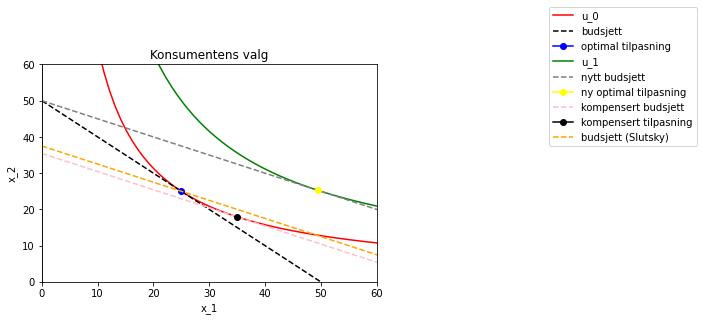

In [343]:
ax.plot(x1_num, x_2_bud(75,1,2,x1_num), label='budsjett (Slutsky)', color='orange', ls='dashed')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Legg merke til at Slutsky sin metode gjør at konsumentene får det bedre enn i utgangspunktet. Mens Hicks er den teoretiske riktige måten å kompensere på er den vanskelig i praksis. Slutsky er en tilnærming til den riktige metoden, men lettere å gjennomføre.

### deloppgave i)

Tenk på hva som skjer når en pris øker. Vi vrir vår tilpasning i retning av det gode som er blitt relativt billigere. Hvor mye tilpasningen endres kommer an på mine preferanser for godene, men justeringen er gjort for å maksimere min nytte i den nye situasjonen. Denne justeringen er substitusjonseffekten. Prisøkningen gjør at min inntekt nå kan kjøpe færre goder, og dette er den egentlige kilden til at jeg har fått det verre. Vi spør derfor "hvor mye inntekt må man ha for å oppnå nytten som før prisøkningen?". Om myndighetene vil kompensere konsumenter for en prisøkning er det dette tillegget i inntekt som bør gis. Dette kan også brukes for å regne ut effekten av en politikk. Tenk at man bygger en strømkabel mellom Nord og Midt-Norge som gjør at prisen på strøm økes med 2 ore/KWt. Man kan bruke inntektseffekten til å beregne hvor mye ekstra inntekt innbyggere i Nord-Norge må ha for å kompensere dette. Dette blir da tatt med som en del av kostnaden ved innføringen av kabelen (mer om dette i kurset om nytte-kostnadsanalyse).